In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import json
import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
from textblob import TextBlob

warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

f = open('/home/pi/twitter_api_creds.json')
creds = json.load(f)
consumer_key = creds['consumer_key']
consumer_secret = creds['consumer_secret']
access_token = creds['access_token']
access_token_secret = creds['access_token_secret']
f.close()

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [2]:
#calls on text cleanup then removes the URL
def remove_url(txt):
    txt = clean(txt)
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
#Cleans up the text like newlines before url is removed.
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

# # preprocessing speeches
# df['Speech_clean'] = df['Speech'].apply(clean)

In [3]:
# Create a custom search term and define the number of tweets
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [7]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

,polarity,tweet
0,0.000000,Seems to be in our favor for a change Kafkaesq...
1,0.000000,Watch a short primer on Climate Resilience to ...
2,0.500000,Most food scraps are now banned from the trash...
3,0.355556,Companies that produce clean energy are crucia...
4,0.000000,For Some California Farmers a Virus Driven Dro...


In [8]:
#put into dataframe
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head()

,polarity,tweet
0,0.000000,Seems to be in our favor for a change Kafkaesq...
1,0.000000,Watch a short primer on Climate Resilience to ...
2,0.500000,Most food scraps are now banned from the trash...
3,0.355556,Companies that produce clean energy are crucia...
4,0.000000,For Some California Farmers a Virus Driven Dro...


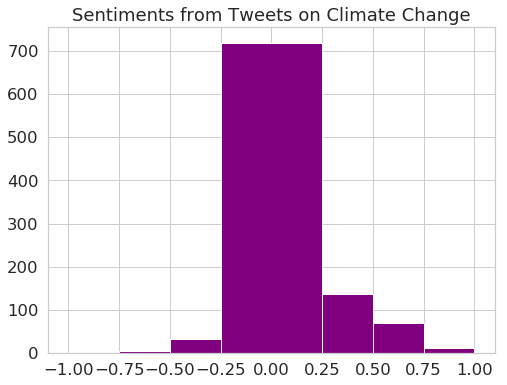

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

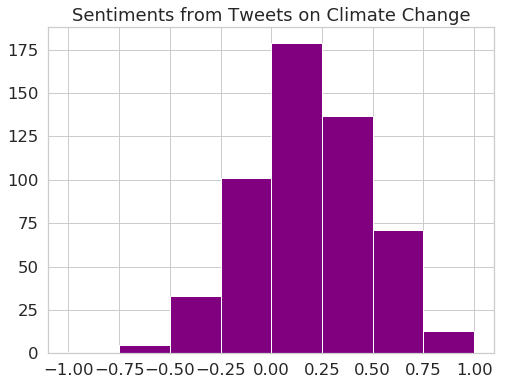

In [10]:
# filter out no sentiment words
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()